In [2]:
#Import Python Packages
#from google.colab import drive
#drive.mount('/content/drive/')

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [110]:
#Import all necessary library

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
get_ipython().system('pip install vecstack')
from collections import Counter #for Smote, 
import warnings
from vecstack import stacking

from sklearn.metrics import accuracy_score #works
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix,classification_report




In [111]:
#Read training data file
trainfile = r'/gdrive/My Drive/Churn-Train-2.csv'
trainData = pd.read_csv(trainfile)

#Read test data file
testfile = r'/gdrive/My Drive/Churn-Test-2.csv'
testData = pd.read_csv(testfile)

trainData.head()
#print("=======")
testData.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,TARGET
0,VT,50,415,yes,yes,26,307.1,94,52.21,289.4,78,24.60,174.9,109,7.87,8.0,3,2.16,0,0
1,UT,72,415,no,no,0,118.2,106,20.09,167.2,136,14.21,214.2,106,9.64,12.2,3,3.29,3,0
2,KS,130,510,no,no,0,154.0,95,26.18,205.9,106,17.50,233.7,75,10.52,12.9,1,3.48,1,0
3,NV,143,408,no,no,0,155.5,101,26.44,213.4,89,18.14,237.9,61,10.71,7.6,11,2.05,1,0
4,DE,89,510,yes,no,0,125.6,108,21.35,213.0,90,18.11,181.7,108,8.18,5.4,5,1.46,1,0


In [112]:
print(trainData.shape)      # To get (Number of Rows, Number of Columns) of a data frame we use DataFrame.shape 
print(testData.shape)

(1165, 20)
(1261, 20)


In [113]:
# To check basic statistics of a data set, column wise
trainData.describe()



,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,TARGET
count,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000,1165.000000
mean,100.107296,437.899571,8.319313,181.588412,100.605150,30.870532,199.351073,99.871245,16.945021,199.931159,100.104721,8.996927,10.228155,4.550215,2.762172,1.539056,0.125322
std,40.128933,42.861654,13.730382,54.392831,19.819381,9.246717,52.633766,20.077314,4.473876,51.233628,19.899559,2.305449,2.833913,2.538757,0.765126,1.307352,0.331226
min,1.000000,408.000000,0.000000,12.500000,30.000000,2.130000,31.200000,12.000000,2.650000,43.700000,42.000000,1.970000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,146.800000,88.000000,24.960000,164.400000,87.000000,13.970000,167.000000,87.000000,7.520000,8.400000,3.000000,2.270000,1.000000,0.000000
50%,98.000000,415.000000,0.000000,182.300000,101.000000,30.990000,200.200000,100.000000,17.020000,200.500000,101.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,128.000000,510.000000,21.000000,216.000000,114.000000,36.720000,234.100000,114.000000,19.900000,236.600000,114.000000,10.650000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,351.600000,168.000000,29.890000,364.300000,175.000000,16.390000,20.000000,19.000000,5.400000,9.000000,1.000000


In [114]:
#To get list of names of all Columns from a dataframe

TrainCols = list(trainData.columns.values)
TestCols = list(testData.columns.values)
print(TrainCols)
print(TestCols)



['State', 'Account Length', 'Area Code', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'TARGET']
['State', 'Account Length', 'Area Code', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'TARGET']


In [115]:
#Do one Hot encoding for categorical features

categoricalFeatures = ["State","Int'l Plan","VMail Plan"]
combined_Data = pd.concat([trainData_Copy, testData_Copy], keys=[0,1])
combined_Data = pd.get_dummies(combined_Data,columns=categoricalFeatures)


print (combined_Data.shape)
#Separate Train data and test data
X_Train = combined_Data.xs(0)
X_Test = combined_Data.xs(1)

X_Test.head()





(2426, 71)


,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Int'l Plan_no,Int'l Plan_yes,VMail Plan_no,VMail Plan_yes
0,50,415,26,307.1,94,52.21,289.4,78,24.60,174.9,109,7.87,8.0,3,2.16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1,72,415,0,118.2,106,20.09,167.2,136,14.21,214.2,106,9.64,12.2,3,3.29,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
2,130,510,0,154.0,95,26.18,205.9,106,17.50,233.7,75,10.52,12.9,1,3.48,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,143,408,0,155.5,101,26.44,213.4,89,18.14,237.9,61,10.71,7.6,11,2.05,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,89,510,0,125.6,108,21.35,213.0,90,18.11,181.7,108,8.18,5.4,5,1.46,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [116]:
# Initialising Decision Tree Algorithm and fitting the model on train set
dt = DecisionTreeClassifier(max_leaf_nodes=50)
dt.fit(X_Train, Y_Train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=50,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [118]:
# For us to check accuracy of our algorithm, we need to predict that data set for which we have TARGET available. 
# Eg predict for Xtrain and check accuracy with TARGET that we have in order to judge our model.

X_Pred = dt.predict(X_Test)
#Model Accuracy
print("Accuracy:", metrics.accuracy_score(Y_Test,X_Pred))

print(classification_report(Y_Test,X_Pred ))  

dt_cv_score = cross_val_score(dt, X_Train, Y_Train, cv=10, scoring="roc_auc")
print("=== All AUC Scores ===")
print(dt_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Boosting: ",dt_cv_score.mean())



Accuracy: 0.929421094369548
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1069
           1       0.88      0.62      0.73       192

    accuracy                           0.93      1261
   macro avg       0.91      0.80      0.84      1261
weighted avg       0.93      0.93      0.92      1261

=== All AUC Scores ===
[0.56372549 0.66928105 0.74771242 0.75915033 0.76732026 0.7780112
 0.66701681 0.81337535 0.58473389 0.80462046]


=== Mean AUC Score ===
Mean AUC Score - Boosting:  0.7154947259431825


[Text(242.72412219101125, 209.6742857142857, 'X[15] <= 3.5\ngini = 0.204\nsamples = 815\nvalue = [721, 94]'),
 Text(180.7426264044944, 194.14285714285714, 'X[3] <= 302.15\ngini = 0.15\nsamples = 749\nvalue = [688, 61]'),
 Text(120.49508426966293, 178.61142857142858, 'X[67] <= 0.5\ngini = 0.131\nsamples = 738\nvalue = [686, 52]'),
 Text(22.570786516853936, 163.07999999999998, 'X[14] <= 3.44\ngini = 0.438\nsamples = 71\nvalue = [48, 23]'),
 Text(15.047191011235956, 147.54857142857142, 'X[13] <= 2.5\ngini = 0.266\nsamples = 57\nvalue = [48, 9]'),
 Text(7.523595505617978, 132.01714285714286, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(22.570786516853936, 132.01714285714286, 'X[4] <= 53.5\ngini = 0.077\nsamples = 50\nvalue = [48, 2]'),
 Text(15.047191011235956, 116.48571428571428, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(30.094382022471912, 116.48571428571428, 'X[6] <= 324.85\ngini = 0.04\nsamples = 49\nvalue = [48, 1]'),
 Text(22.570786516853936, 100.9542857142857, 'gini = 0

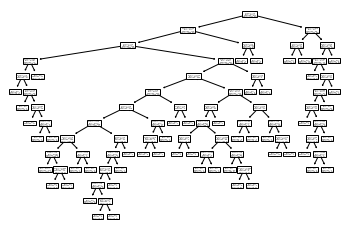

In [100]:
#Plotting the decision Tree
tree.plot_tree(dt)

In [101]:
rf = RandomForestClassifier(max_leaf_nodes=50)
rf.fit(X_Train, Y_Train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=50, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [102]:
X_Pred = rf.predict(X_Test)
#Model Accuracy
print("Accuracy:", metrics.accuracy_score(Y_Test,X_Pred))
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

print(classification_report(Y_Test,X_Pred ))  

rf_cv_score = cross_val_score(rf, X_Train, Y_Train, cv=10, scoring="roc_auc")
print("=== All AUC Scores ===")
print(rf_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Boosting: ",rf_cv_score.mean())


Accuracy: 0.8826328310864393
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1069
           1       0.96      0.24      0.38       192

    accuracy                           0.88      1261
   macro avg       0.92      0.62      0.66      1261
weighted avg       0.89      0.88      0.85      1261

=== All AUC Scores ===
[0.84575163 0.92745098 0.90326797 0.82026144 0.91830065 0.92787115
 0.98039216 0.86414566 0.92507003 0.85742574]


=== Mean AUC Score ===
Mean AUC Score - Boosting:  0.8969937413909458


In [103]:
gb =GradientBoostingClassifier()
gb.fit(X_Train, Y_Train)
gb_predict=gb.predict(X_Test)

X_Pred = gb.predict(X_Test)
#Model Accuracy
print("Accuracy:", metrics.accuracy_score(Y_Test,X_Pred))
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

print(classification_report(Y_Test,X_Pred ))  

gb_cv_score = cross_val_score(gb, X_Train, Y_Train, cv=10, scoring="roc_auc")
print("=== All AUC Scores ===")
print(gb_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Boosting: ",gb_cv_score.mean())


Accuracy: 0.9278350515463918
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1069
           1       0.90      0.59      0.71       192

    accuracy                           0.93      1261
   macro avg       0.92      0.79      0.84      1261
weighted avg       0.93      0.93      0.92      1261

=== All AUC Scores ===
[0.86666667 0.95555556 0.91633987 0.83921569 0.94444444 0.93347339
 0.97058824 0.86764706 0.96428571 0.8349835 ]


=== Mean AUC Score ===
Mean AUC Score - Boosting:  0.9093200118331162


In [104]:
mlp = MLPClassifier()
mlp.fit(X_Train, Y_Train)

X_Pred = mlp.predict(X_Test)
#Model Accuracy
print("Accuracy:", metrics.accuracy_score(Y_Test,X_Pred))
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

print(classification_report(Y_Test,X_Pred ))  

mlp_cv_score = cross_val_score(mlp, X_Train, Y_Train, cv=10, scoring="roc_auc")
print("=== All AUC Scores ===")
print(mlp_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Boosting: ",mlp_cv_score.mean())


Accuracy: 0.8080888183980968
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1069
           1       0.41      0.60      0.49       192

    accuracy                           0.81      1261
   macro avg       0.67      0.72      0.69      1261
weighted avg       0.84      0.81      0.82      1261

=== All AUC Scores ===
[0.6627451  0.7496732  0.76078431 0.67189542 0.84248366 0.75070028
 0.89915966 0.78851541 0.82072829 0.78745875]


=== Mean AUC Score ===
Mean AUC Score - Boosting:  0.7734144086677575


In [105]:
#SMOTE
print("___________________________________________________________________\nSMOTE\n")
print('Original dataset shape %s' % Counter(Y_Train))
sm = SMOTE(sampling_strategy='float', ratio=0.5)
X_res, y_res = sm.fit_resample(X_Train, Y_Train)
print('Resampled dataset shape %s' % Counter(y_res))


___________________________________________________________________
SMOTE

Original dataset shape Counter({0: 1019, 1: 146})
Resampled dataset shape Counter({0: 1019, 1: 509})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [106]:
models = [ DecisionTreeClassifier(),GradientBoostingClassifier(), MLPClassifier()]
      
S_Train, S_Test = stacking(models,                   
                           X_res, y_res, X_test,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=4, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)



task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [DecisionTreeClassifier]
    fold  0:  [0.87696335]
    fold  1:  [0.89528796]
    fold  2:  [0.92408377]
    fold  3:  [0.91884817]
    ----
    MEAN:     [0.90379581] + [0.01891123]
    FULL:     [0.90379581]

model  1:     [GradientBoostingClassifier]
    fold  0:  [0.92931937]
    fold  1:  [0.94764398]
    fold  2:  [0.92931937]
    fold  3:  [0.94502618]
    ----
    MEAN:     [0.93782723] + [0.00855805]
    FULL:     [0.93782723]

model  2:     [MLPClassifier]
    fold  0:  [0.82984293]
    fold  1:  [0.82984293]
    fold  2:  [0.73560209]
    fold  3:  [0.83507853]
    ----
    MEAN:     [0.80759162] + [0.04161810]
    FULL:     [0.80759162]



In [122]:
# In[10]:
#STACKING - CONTRUCT A RF Model==============================
model = RandomForestClassifier()
    
model = model.fit(S_Train, y_res)
y_pred = model.predict(S_Test)


In [123]:
#Model Accuracy
print("Accuracy:", metrics.accuracy_score(Y_test,y_pred))

print(classification_report(Y_test,y_pred ))  

m_cv_score = cross_val_score(model, S_Train, y_res, cv=10, scoring="roc_auc")
print("=== All AUC Scores ===")
print(m_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Boosting: ",m_cv_score.mean())


Accuracy: 0.9828571428571429
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       298
           1       1.00      0.88      0.94        52

    accuracy                           0.98       350
   macro avg       0.99      0.94      0.96       350
weighted avg       0.98      0.98      0.98       350

=== All AUC Scores ===
[0.9151288  0.91253364 0.88216071 0.97327951 0.96434064 0.97510573
 0.97558631 0.985198   0.95539216 0.98689575]


=== Mean AUC Score ===
Mean AUC Score - Boosting:  0.9525621238594448


In [108]:
#Hyper Parameter Tuning

parameters={ 'n_estimators': range(50,150,20),'min_samples_split' : range(10,100,10),'max_depth': range(1,20,2)}
rfc_random = RandomizedSearchCV(model,parameters,n_iter=15)
rfc_random.fit(S_Train, y_res)
grid_parm_rfc=rfc_random.best_params_
print(grid_parm_rfc)

#contruct random forest using the best parameters
rfc= RandomForestClassifier(**grid_parm_rfc)
rfc.fit(S_Train,y_res)
rfc_predict = rfc.predict(S_Test)


{'n_estimators': 110, 'min_samples_split': 20, 'max_depth': 5}


In [120]:
#Model Accuracy
print("Accuracy:", metrics.accuracy_score(Y_test,rfc_predict))

print(classification_report(Y_test,rfc_predict ))  

rfc_cv_score = cross_val_score(rfc, S_Train, y_res, cv=10, scoring="roc_auc")
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Boosting: ",rfc_cv_score.mean())


Accuracy: 0.9828571428571429
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       298
           1       1.00      0.88      0.94        52

    accuracy                           0.98       350
   macro avg       0.99      0.94      0.96       350
weighted avg       0.98      0.98      0.98       350

=== All AUC Scores ===
[0.9151288  0.91253364 0.88273741 0.97327951 0.96434064 0.97452903
 0.97558631 0.985198   0.95539216 0.98689575]


=== Mean AUC Score ===
Mean AUC Score - Boosting:  0.9525621238594448
